# CARDIOVASCULAR DISEASE DETECTION
## FINAL CAPSTONE PROJECT - EXPLORATORY DATA ANALYSIS

### This dataset is obtained from kaggle.com.

#### Cardiovascular disease is a generalized term that encompasses various disorders that affect the heart and its blood vessels. Cardiovascular disease impacts over 10 million lives globally. This disease is also the leading cause of death both nationally and globally. There are many contributing factors including genetics, diet, lifestyle status and many health factors.

#### Using this dataset, we are aiming to generate a model that will allow us to potentially determine if a subject will have the presence or absence of cardiovascular disease based on various Demographics and Vital Sign Factors.

### LIBRARIES AND DATA:

In [1]:
# IMPORT DATA LIBRARIES 
import numpy as np 
import pandas as pd 

# IMPORT VIS LIBRARIES 
import seaborn as sns 
import matplotlib.pyplot as plt 

# IMPORT MODELLING LIBRARIES 
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report,confusion_matrix, precision_score, accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, make_scorer, recall_score, roc_auc_score, roc_curve, auc  
from sklearn.pipeline import Pipeline

In [2]:
cardiac_base=pd.read_csv('Data/cardio_train.csv', sep = ';')
cardiac_base.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [3]:
cardiac_base.set_index('id', inplace=True)

In [4]:
cardiac_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
cardiac_base.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### DATA SUBSET:

#### Upon review of the dataset, many values for Vital Signs variables were noticed that seemed too extremely low or too extremely high. With that in mind, a subset of the initial dataset was generated based on standard ranges of Height, Weight, Diastolic Blood Pressure and Systolic Blood Pressure.

In [6]:
cardiac = cardiac_base.loc[(cardiac_base['height'] >= 140) & (cardiac_base['height'] <= 200) 
                           & (cardiac_base['weight'] >= 55) 
                           & (cardiac_base['ap_hi'] >= 90) & (cardiac_base['ap_hi'] <= 180) 
                           & (cardiac_base['ap_lo'] >= 60) & (cardiac_base['ap_lo'] <= 120),
                           ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
cardiac

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [7]:
cardiac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64840 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64840 non-null  int64  
 1   gender       64840 non-null  int64  
 2   height       64840 non-null  int64  
 3   weight       64840 non-null  float64
 4   ap_hi        64840 non-null  int64  
 5   ap_lo        64840 non-null  int64  
 6   cholesterol  64840 non-null  int64  
 7   gluc         64840 non-null  int64  
 8   smoke        64840 non-null  int64  
 9   alco         64840 non-null  int64  
 10  active       64840 non-null  int64  
 11  cardio       64840 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [8]:
cardiac.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000,64840.000000
mean,19480.878856,1.357943,164.850586,75.285027,126.857264,81.504303,1.367659,1.228871,0.088819,0.054318,0.802498,0.502884
std,2458.696662,0.479399,7.651329,13.509429,15.826915,9.042922,0.682093,0.575404,0.284484,0.226646,0.398117,0.499996
min,10798.000000,1.000000,140.000000,55.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17696.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19709.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21330.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,198.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### TRANSFORMATION:

In [9]:
cardiac['age_yr']=round(cardiac['age']/365.25,2)
cardiac

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.36
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.38
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.63
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.25
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.68
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.88
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.20


### EXPLORATORY ANALYSIS:

#### TARGET VARIABLE ANALYSIS:

In [10]:
conditions_cardio = [(cardiac['cardio'] == 0), (cardiac['cardio'] == 1)]
values_cardio = ['Absence', 'Presence']

cardiac['target'] = np.select(conditions_cardio, values_cardio)

In [11]:
target_counts = cardiac['target'].value_counts()
print(target_counts)

target
Presence    32607
Absence     32233
Name: count, dtype: int64


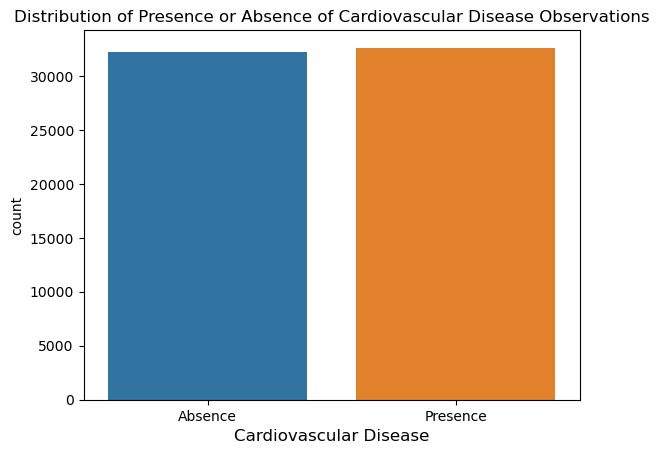

In [12]:
sns.countplot(data=cardiac, x = 'target')
plt.title('Distribution of Presence or Absence of Cardiovascular Disease Observations')
plt.xlabel('Cardiovascular Disease', size=12)

plt.savefig('images/Target_Proportions.png')

##### Based on the counts and the histogram of the distribution, we can determine that the 2 values for the target variable are evenly distributed.

#### CHOLESTEROL ANALYSIS:

In [14]:
conditions_chol = [(cardiac['cholesterol'] == 1), (cardiac['cholesterol'] == 2), (cardiac['cholesterol'] == 3)] 
values_col_gluc = ['Normal', 'Above Normal', 'Well Above Normal']

cardiac['chol'] = np.select(conditions_chol, values_col_gluc)

In [15]:
chol_counts = cardiac['chol'].value_counts()
print(chol_counts)

chol
Normal               48547
Above Normal          8747
Well Above Normal     7546
Name: count, dtype: int64


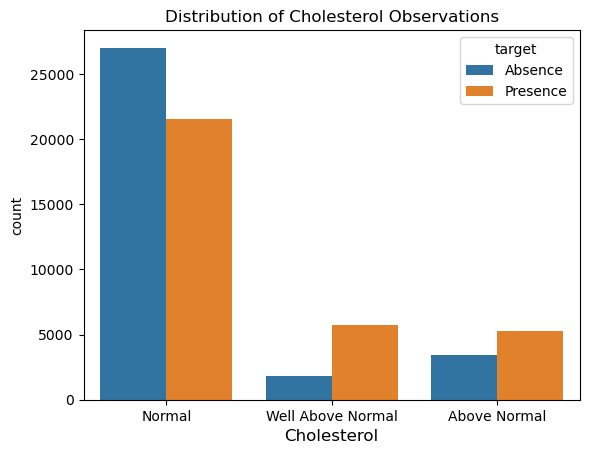

In [16]:
sns.countplot(data=cardiac, x = 'chol', hue="target")
plt.title('Distribution of Cholesterol Observations')
plt.xlabel('Cholesterol', size=12)

plt.savefig('images/Cholesterol_Proportions.png')

##### Based on the histograms of the distribution, we can determine that the target value distributions align with what one would expect in determining the Presence or Absence of Cardiovascular disease. When Cholesterol is Above Normal or Well Above Normal, the results align with a greater count of Presence of Cardiovascular Disease.

#### GLUCOSE ANALYSIS:

In [17]:
conditions_gluc = [(cardiac['gluc'] == 1), (cardiac['gluc'] == 2), (cardiac['gluc'] == 3)]
values_col_gluc = ['Normal', 'Above Normal', 'Well Above Normal']

cardiac['glucose'] = np.select(conditions_gluc, values_col_gluc)

In [18]:
gluc_counts = cardiac['glucose'].value_counts()
print(gluc_counts)

glucose
Normal               55012
Well Above Normal     5012
Above Normal          4816
Name: count, dtype: int64


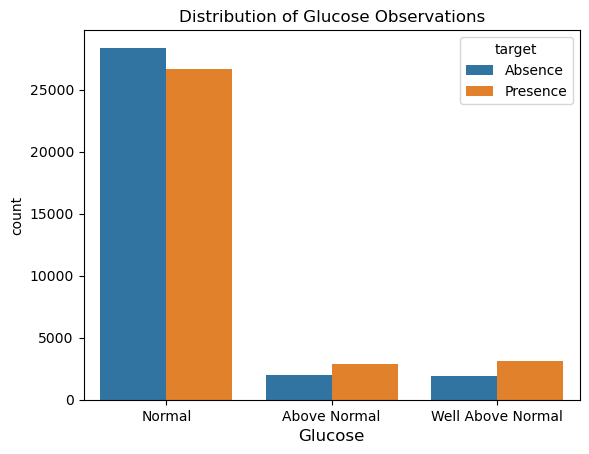

In [19]:
sns.countplot(data=cardiac, x = 'glucose', hue="target")
plt.title('Distribution of Glucose Observations')
plt.xlabel('Glucose', size=12)

plt.savefig('images/Glucose_Proportions.png')

##### Based on the histograms of the distribution, we can determine that the target value distributions align with what one would expect in determining the Presence or Absence of Cardiovascular disease. When Glucose is Above Normal or Well Above Normal, the results align with a greater count of Presence of Cardiovascular Disease. This distribution is also quite similar to that of Cholesterol

#### SMOKING ANALYSIS:

In [20]:
conditions_smoke = [(cardiac['smoke'] == 0), (cardiac['smoke'] == 1)]
values_y_n = ['No', 'Yes']

cardiac['smoking'] = np.select(conditions_smoke, values_y_n)

In [21]:
smoke_counts = cardiac['smoking'].value_counts()
print(smoke_counts)

smoking
No     59081
Yes     5759
Name: count, dtype: int64


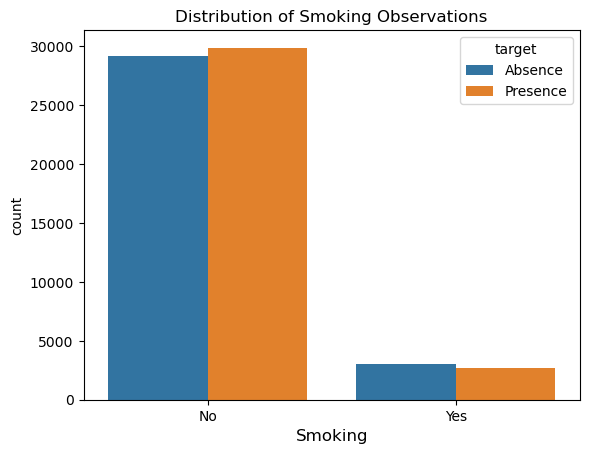

In [22]:
sns.countplot(data=cardiac, x = 'smoking', hue="target")
plt.title('Distribution of Smoking Observations')
plt.xlabel('Smoking', size=12)

plt.savefig('images/Smoking_Proportions.png')

##### Though the distribution of Smoking is greatly favored towards those who do not smoke, the distribution of the target variable values is quite evenly distributed among those who do smoke and those who do not smoke.

#### ALCOHOL INTAKE ANALYSIS:

In [23]:
conditions_alco = [(cardiac['alco'] == 0), (cardiac['alco'] == 1)]
values_y_n = ['No', 'Yes']

cardiac['alcohol'] = np.select(conditions_alco, values_y_n)

In [24]:
alcohol_counts = cardiac['alcohol'].value_counts()
print(alcohol_counts)

alcohol
No     61318
Yes     3522
Name: count, dtype: int64


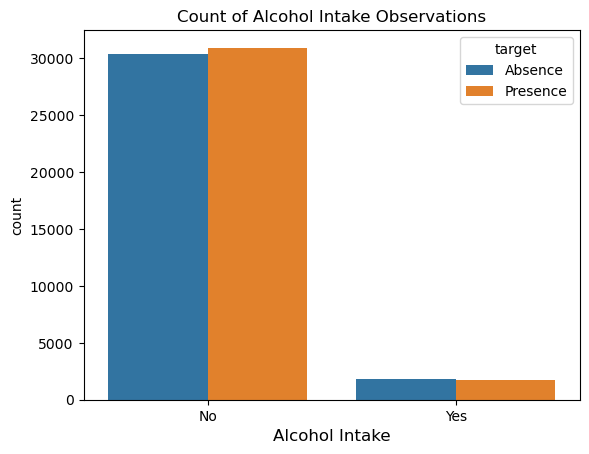

In [25]:
sns.countplot(data=cardiac, x = 'alcohol', hue="target")
plt.title('Count of Alcohol Intake Observations')
plt.xlabel('Alcohol Intake', size=12)

plt.savefig('images/Alcohol_Proportions.png')

##### Though the distribution of Alcohol Intake is greatly favored towards those who do not drink Alcohol, the distribution of the target variable values is quite evenly distributed among those who do consume alcohol and those who do not consume alcohol.

#### PHYSICAL ACTIVITY ANALYSIS:

In [26]:
conditions_active = [(cardiac['active'] == 0), (cardiac['active'] == 1)]
values_y_n = ['No', 'Yes']

cardiac['phys_activity'] = np.select(conditions_active, values_y_n)

In [27]:
activity_counts = cardiac['phys_activity'].value_counts()
print(activity_counts)

phys_activity
Yes    52034
No     12806
Name: count, dtype: int64


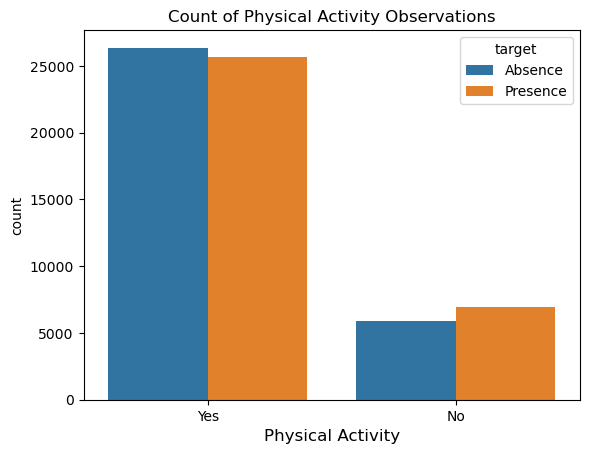

In [28]:
sns.countplot(data=cardiac, x = 'phys_activity', hue="target")
plt.title('Count of Physical Activity Observations')
plt.xlabel('Physical Activity', size=12)

plt.savefig('images/Physical_Activity_Proportions.png')

##### Though the distribution of Physical Acitvity is greatly favored towards those who are Physically Active, the distribution of the target variable values for those who have no physical activity aligns with what is expected. 

#### AGE ANALYSIS:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


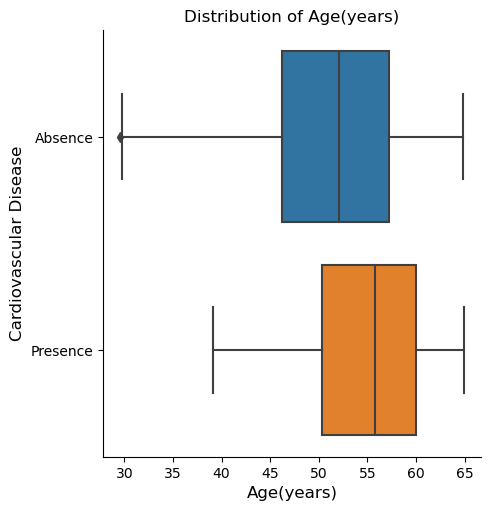

In [29]:
sns.catplot(data=cardiac, x="age_yr", y="target", kind="box")
plt.title('Distribution of Age(years)')
plt.xlabel('Age(years)', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/Age_Distribution.png')

#### HEIGHT ANALYSIS:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


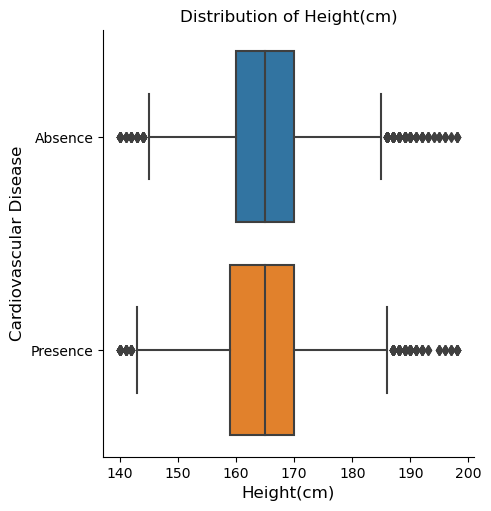

In [30]:
sns.catplot(data=cardiac, x="height", y="target", kind="box")
plt.title('Distribution of Height(cm)')
plt.xlabel('Height(cm)', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/Height_Distribution.png')

#### WEIGHT DISTRIBUTION:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


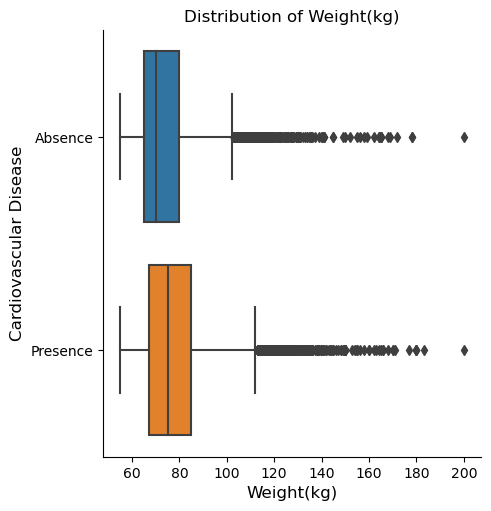

In [31]:
sns.catplot(data=cardiac, x="weight", y="target", kind="box")
plt.title('Distribution of Weight(kg)')
plt.xlabel('Weight(kg)', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/Weight_Distribution.png')

#### SYSTOLIC BLOOD PRESSURE DISTRIBUTION:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


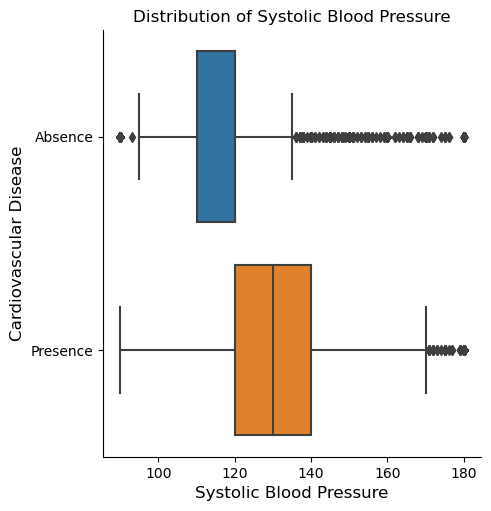

In [32]:
sns.catplot(data=cardiac, x="ap_hi", y="target", kind="box")
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/SysBP_Distribution.png')

#### DIASTOLIC BLOOD PRESSURE DISTRIBUTION:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


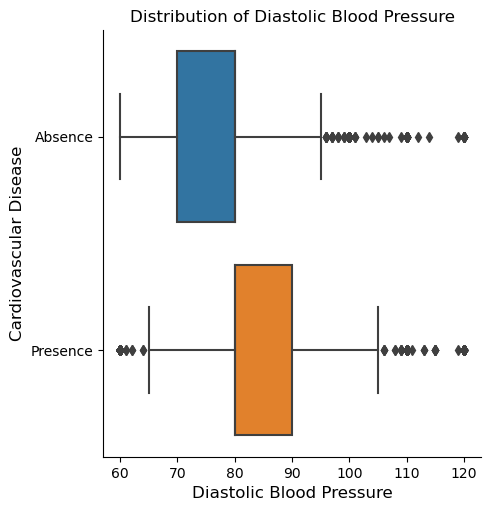

In [33]:
sns.catplot(data=cardiac, x="ap_lo", y="target", kind="box")
plt.title('Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/DiasBP_Distribution.png')